In [11]:
import keras
import keras.backend as K
from keras import layers
from keras import Input, Model
from sklearn.metrics import accuracy_score

In [2]:
import h5py
import numpy as np
import tqdm

from sklearn.model_selection import train_test_split

In [4]:
COLLAB = False

if COLLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH_TO_DATA = "/content/drive/My Drive/collab_shared/dataset_20x30x10000.h5"
else:
    PATH_TO_DATA = "test_dataset_20x30x10000.h5"

In [5]:
with h5py.File(PATH_TO_DATA) as f:
    X = f["x_train"][:]
    Y = f["y_train"][:]

In [6]:
def reshape_input(X):
    return X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

def pad_input(X):
    return reshape_input(np.array([
        np.pad(x.reshape((20, 30)), (1,1), mode='wrap')
        for x in X
    ]))

In [7]:
X = pad_input(X)
Y = reshape_input(Y)

In [8]:
model = keras.models.load_model("gol.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [12]:
res = model.predict(X)

In [32]:
i = 0

In [50]:
while True:
    if np.count_nonzero((res[i]>0.5).astype(int)-Y[i]):
        break
    i+=1

In [38]:
import matplotlib.pyplot as plt

In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


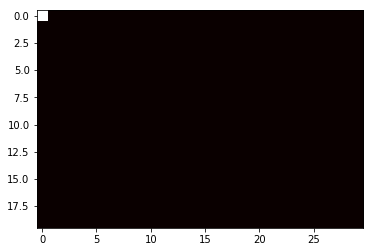

In [51]:
plt.imshow(((res[i]>0.5).astype(int) - Y[i]).reshape(20,30), cmap='hot', interpolation='nearest')
plt.show()